
<h1>Extract person's electricity consumption from a raw file</h2>


In [53]:
from numpy.random import seed
seed(1)

In [54]:
def get_person_elect(person_id, INPUT_DATA_DIR, INPUT_RAW_FILE):
    # Open the file
    fld = open(os.path.join(DATA_DIR, RAW_FILE), encoding='utf-8')    
    elec_con = [] # to record elec. spending
    date_cols = [] # to record date and time

    line_num = 0
    for line in fld:
        # Skip the first line to refer to the users
        if line.startswith("\"\";"):
            continue
        # print a progress
        if line_num % 50000 == 0:
            print("{:d} lines read".format(line_num))
        # Except for the first column, date, parse with ";" and replect "," with "."
        cols = [float(re.sub(",", ".", x)) for x in 
                line.strip().split(";")[1:]]
        # add electricity spending
        elec_con.append(cols[person_id])

        # extract the first column
        date = line.strip().split(";")[0]
        # Remove " on both sides
        date = date.strip('"')
        date_cols.append(date)

        line_num += 1
    fld.close()
    
    return date_cols, elec_con
    

In [55]:
import pandas as pd
def save_person_elect(OUTPUT_DIR, person_id, date_col, elect_col):
    data_with_date = {'date':date_cols, 'elec_con':elec_con}
    df_data_with_date = pd.DataFrame(data = data_with_date)

    # Save date and spending as a csv file
    file_path = OUTPUT_DIR + "elect_" + str(person_id) + ".csv"
    df_data_with_date.to_csv(file_path, index=False)
    print("Shape of ", file_path , df_data_with_date.shape)

In [56]:
def show_person_elect(elec_con):
    NUM_ENTRIES = 1000
    plt.plot(range(NUM_ENTRIES), elec_con[0:NUM_ENTRIES])
    plt.ylabel("electricity consumption")
    plt.xlabel("time (1pt = 15 mins)")
    plt.show()



<h3>The first person</h3>

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

INPUT_DATA_DIR = "../input/electricity/"
INPUT_RAW_FILE = "LD2011_2014.txt"
OUTPUT_DATA_DIR = "../input/electricity/"

person_id = int(np.random.randint(0, 370, 1))
#person_id = 250 # to select a user named 250
print("person_id: ", person_id)

date_col, elect_col = get_person_elect(person_id, INPUT_DATA_DIR, INPUT_RAW_FILE )
print("shape of date_col: ", len(date_col))
print("shape of elect_col: ", len(elect_col))


person_id:  37
0 lines read
50000 lines read
100000 lines read
shape of date_col:  140256
shape of elect_col:  140256


Shape of  ../input/electricity/elect_37.csv (140256, 2)


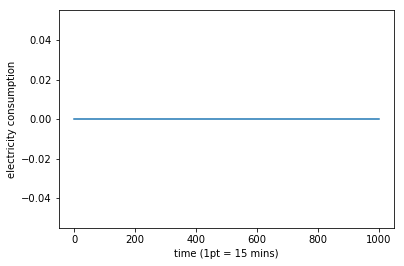

In [58]:
save_person_elect(OUTPUT_DATA_DIR, person_id, date_col, elect_col)
show_person_elect(elect_col)



<h3>The second person</h3>

person_id:  235
0 lines read
50000 lines read
100000 lines read
shape of date_col:  140256
shape of elect_col:  140256
Shape of  ../input/electricity/elect_235.csv (140256, 2)


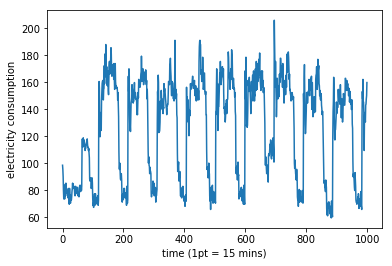

In [59]:
person_id = int(np.random.randint(0, 370, 1))
#person_id = 250 # to select a user named 250
print("person_id: ", person_id)

date_col, elect_col = get_person_elect(person_id, INPUT_DATA_DIR, INPUT_RAW_FILE )
print("shape of date_col: ", len(date_col))
print("shape of elect_col: ", len(elect_col))
save_person_elect(OUTPUT_DATA_DIR, person_id, date_col, elect_col)
show_person_elect(elect_col)

<h3>The third person</h3>

person_id:  250
0 lines read
50000 lines read
100000 lines read
shape of date_col:  140256
shape of elect_col:  140256
Shape of  ../input/electricity/elect_250.csv (140256, 2)


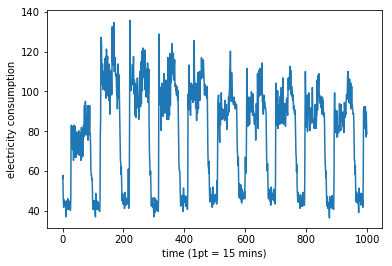

In [60]:
#person_id = int(np.random.randint(0, 370, 1))
person_id = 250 # to select a user named 250
print("person_id: ", person_id)

date_col, elect_col = get_person_elect(person_id, INPUT_DATA_DIR, INPUT_RAW_FILE )
print("shape of date_col: ", len(date_col))
print("shape of elect_col: ", len(elect_col))
save_person_elect(OUTPUT_DATA_DIR, person_id, date_col, elect_col)
show_person_elect(elect_col)